correctrate: train: 0.8170289855072463, test: 0.8115942028985508
correctrate: train: 0.8333333333333334, test: 0.855072463768116
correctrate: train: 0.8405797101449275, test: 0.8768115942028986
correctrate: train: 0.8387681159420289, test: 0.8913043478260869
correctrate: train: 0.842391304347826, test: 0.9057971014492754
correctrate: train: 0.8478260869565217, test: 0.9057971014492754
correctrate: train: 0.8496376811594203, test: 0.9057971014492754
correctrate: train: 0.8496376811594203, test: 0.9130434782608695
correctrate: train: 0.8514492753623188, test: 0.9130434782608695
correctrate: train: 0.8514492753623188, test: 0.9130434782608695
correctrate: train: 0.8514492753623188, test: 0.9130434782608695
correctrate: train: 0.8568840579710145, test: 0.9130434782608695
correctrate: train: 0.855072463768116, test: 0.9130434782608695
correctrate: train: 0.8532608695652174, test: 0.9130434782608695
correctrate: train: 0.8532608695652174, test: 0.9130434782608695
correctrate: train: 0.851449

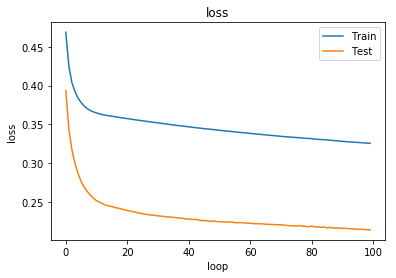

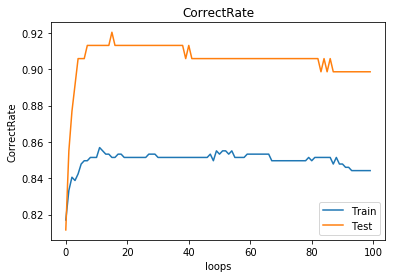

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split

def get_data():
    data = load_svmlight_file("australian.txt")
    return data

def g(X, Y, w,b):
    grad = 0.01*w#1/2c
    for i in range(X.shape[0]):
        if Y[i] * (w.transpose().dot(X[i]) + b) < 1:
            grad -= (X[i] * Y[i]).reshape(X.shape[1], 1)
    return grad

def Loss(X, Y, w, b):
    loss = 0.5 *0.01* w.transpose().dot(w)#1/2c    
    for i in range(X.shape[0]):
        if Y[i] * (w.transpose().dot(X[i]) + b) < 1:
            loss = loss +(1 - Y[i] * (w.transpose().dot(X[i]) + b))
    return loss
                          
def paint(loops, train_loss, test_loss, train_rate, test_rate):
    #tloss
    plt.plot(train_loss, label='Train')
    plt.plot(test_loss, label='Test')
    plt.xlabel('loop')
    plt.ylabel('loss')
    plt.title('loss')
    plt.legend()
    plt.show()
    #CorrectRate
    plt.plot(train_rate,label='Train')
    plt.plot(test_rate, label='Test')
    plt.xlabel('loops')
    plt.ylabel('CorrectRate')
    plt.title('CorrectRate')
    plt.legend()
    plt.show()

                              
if __name__ == '__main__':
                        
    X = get_data()[0]
    y = get_data()[1]

    X = X.toarray()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


    y_train = y_train.reshape(X_train.shape[0], 1)
    y_test = y_test.reshape(X_test.shape[0], 1)

    w = np.random.random(size = (X_train.shape[1], 1))
    b = 2#初始化
    a = 0.001#学习率
    number = 100
    number_now = 0

    losstrain = []
    losstest = []
    ratetrain = []
    ratetest = []

    while number_now < number:
        number_now += 1
        w -= a * g(X_train, y_train,w, b)
        loss_train = Loss(X_train, y_train,w, b)
        loss_test = Loss(X_test, y_test,w, b)
        losstrain.append(loss_train[0] / X_train.shape[0])
        losstest.append(loss_test[0] / X_test.shape[0])
        #correct rate
        number_train = 0
        h1 = y_train * (X_train.dot(w) + b)
        for i in h1:
            if i > 0:
                number_train += 1
        rate_train = number_train / h1.shape[0]
        ratetrain.append(rate_train)
        #correct rate
        number_test = 0
        h2 = y_test * (X_test.dot(w) + b)
        for i in h2:
            if i > 0:
                number_test += 1
        rate_test = number_test / h2.shape[0]
        ratetest.append(rate_test)
            
        print('correctrate: train: {}, test: {}'.format(ratetrain[number_now-1], ratetest[number_now-1]))
         
            
    paint(number, losstrain, losstest, ratetrain, ratetest )
